Question 1 : Calculate the 95% confidence interval for a sample of data with a mean of 50 and a standard deviation of 5 using Python. Interpret the results.

Answer :
Sample size not given in problem , Assuming sample size of 50

In [1]:
import scipy.stats as stats

sample_mean = 50
sample_std_dev = 5
sample_size = 50 # assuming a sample size of 50

# calculate the standard error of the mean
std_error_mean = sample_std_dev / (sample_size ** 0.5)

# Confidence Level
confidence_level = 0.95

# significance level
alpha = 1 -  confidence_level

# calculate the t-value for a 95% confidence interval with 49 degrees of freedom
t_value = stats.t.ppf(1-alpha/2, df=sample_size-1)

# Print critical t-value 
print(f'Critical t statistic for {confidence_level*100:.2f}% for {sample_size} samples : {t_value:.4f}')

# calculate the margin of error
margin_of_error = t_value * std_error_mean
print(f'Margin of error is : {margin_of_error:.2f}')
print(f'Point Estimate of mean is : {sample_mean}')

# calculate the lower and upper bounds of the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print(f"Mean Estimate with 95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")

Critical t statistic for 95.00% for 50 samples : 2.0096
Margin of error is : 1.42
Point Estimate of mean is : 50
Mean Estimate with 95% Confidence Interval: (48.58, 51.42)


Interpretation : Above Results conclude that I can say with 95% confidence that my POPULATION MEAN lies in between 48.58 and 51.42 for sample size of 50

Question 2: Conduct a chi-square goodness of fit test to determine if the distribution of colors of M&Ms in a bag matches the expected distribution of 20% blue, 20% orange, 20% green, 10% yellow, 10% red, and 20% brown. Use Python to perform the test with a significance level of 0.05

Answer :
In this case Observed data is NOT given I'm assuming following data : [10, 20, 15, 5, 5, 15]


In [2]:
import numpy as np
from scipy.stats import chisquare
from scipy.stats import chi2

# observed frequencies
obs_freq = np.array([10, 20, 15, 5, 5, 15])

# expected frequencies
exp_freq = np.array([0.2, 0.2, 0.2, 0.1, 0.1, 0.2]) * np.sum(obs_freq)

# Null and alternate hypothesis
null_hypothesis = "The distribution of colors of M&Ms in the bag matches the expected distribution."
alternate_hypothesis = "The distribution of colors of M&Ms in the bag does not match the expected distribution."

# perform chi-square goodness of fit test
test_statistic, p_value = chisquare(obs_freq, exp_freq)

# print results
print("Test Chi2 statistic:", test_statistic)
print("p-value:", p_value)

# Critical chi2 value
df = len(obs_freq)-1
alpha = 0.05
chi2_crit = chi2.ppf(1-alpha,df)
print(f"Critical Chi Square value for {alpha} significance level for {df} degrees of freedom is : {chi2_crit:.4f}")

# compare p-value with significance level
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis")
    print(f"Conculsion : {alternate_hypothesis}")
else:
    print("Fail to reject null hypothesis")
    print(f"Conclusion : {null_hypothesis}")

Test Chi2 statistic: 5.0
p-value: 0.41588018699550794
Critical Chi Square value for 0.05 significance level for 5 degrees of freedom is : 11.0705
Fail to reject null hypothesis
Conclusion : The distribution of colors of M&Ms in the bag matches the expected distribution.


Question 3 : Use Python to calculate the chi-square statistic and p-value for a contingency table with the following data :

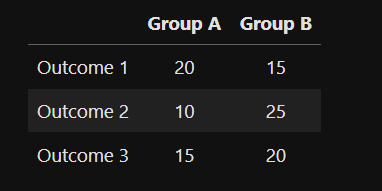

Interpret the results of test

Answer :

In [3]:
from scipy.stats import chi2_contingency
import pandas as pd

# Defining the observed contingency table in pandas
obs_df = pd.DataFrame({'Group A':[20,10,15],'Group B':[15,25,20]})
obs_df.index = ['Outcome 1','Outcome 2','Outcome 3']
print("Observed Dataframe Below :\n")
print(obs_df)
print("\n============================\n")

# Null and Alternate Hypothesis
null_hypothesis = "The outcomes are independent of the groups."
alternate_hypothesis = "The outcomes are Dependent on the groups."

# Calculate the chi-square statistic and p-value
stat, p, dof, expected = chi2_contingency(obs_df)

# Print Expected DataFrame
expected_df = pd.DataFrame(expected)
expected_df.columns = ['Group A','Group B']
expected_df.index = ['Outcome 1','Outcome 2','Outcome 3']
print("Expected Values Dataframe Below :\n")
print(expected_df)

# Print the results
print("\nChi-square statistic:", round(stat,4))
print("p-value:", round(p,4))

# Significance 
alpha = 0.05 

if p < alpha :
    print("Reject the Null Hypothesis")
    print(f"Conclusion : {alternate_hypothesis}")
else:
    print("Failed to reject the Null Hypothesis")
    print(f"Conclusion : {null_hypothesis}")

Observed Dataframe Below :

           Group A  Group B
Outcome 1       20       15
Outcome 2       10       25
Outcome 3       15       20


Expected Values Dataframe Below :

           Group A  Group B
Outcome 1     15.0     20.0
Outcome 2     15.0     20.0
Outcome 3     15.0     20.0

Chi-square statistic: 5.8333
p-value: 0.0541
Failed to reject the Null Hypothesis
Conclusion : The outcomes are independent of the groups.


Validating above results with manual calculation

1. Calculating sums along rows and columns in observed data

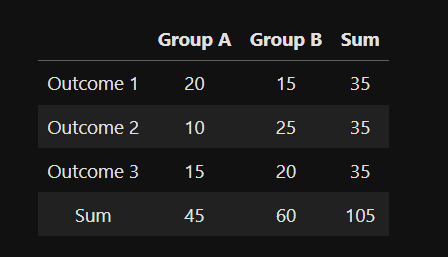

2. Calculating Expected Values using formula Expected Value = (Row Sum*Column Sum)/(Total Sum)

Expected Values

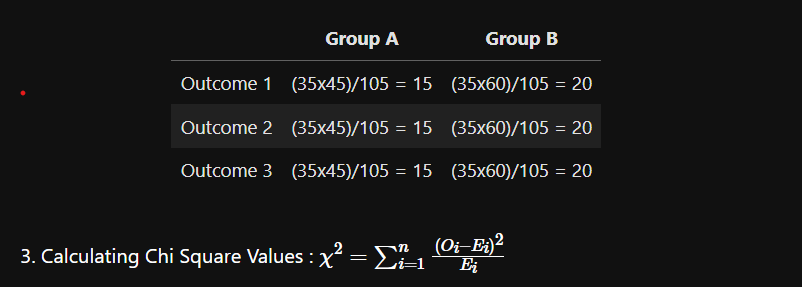

For above Chi Square value is 5.8333

4. Degrees of freedom

Degrees of freedom = (number of rows - 1)*(number of columns - 1)

Degrees of freedom = (3-1)*(2-1) = 2*1 = 2

5. Critical Chi Square value for alpha = 0.05 dof = 2 is 5.991

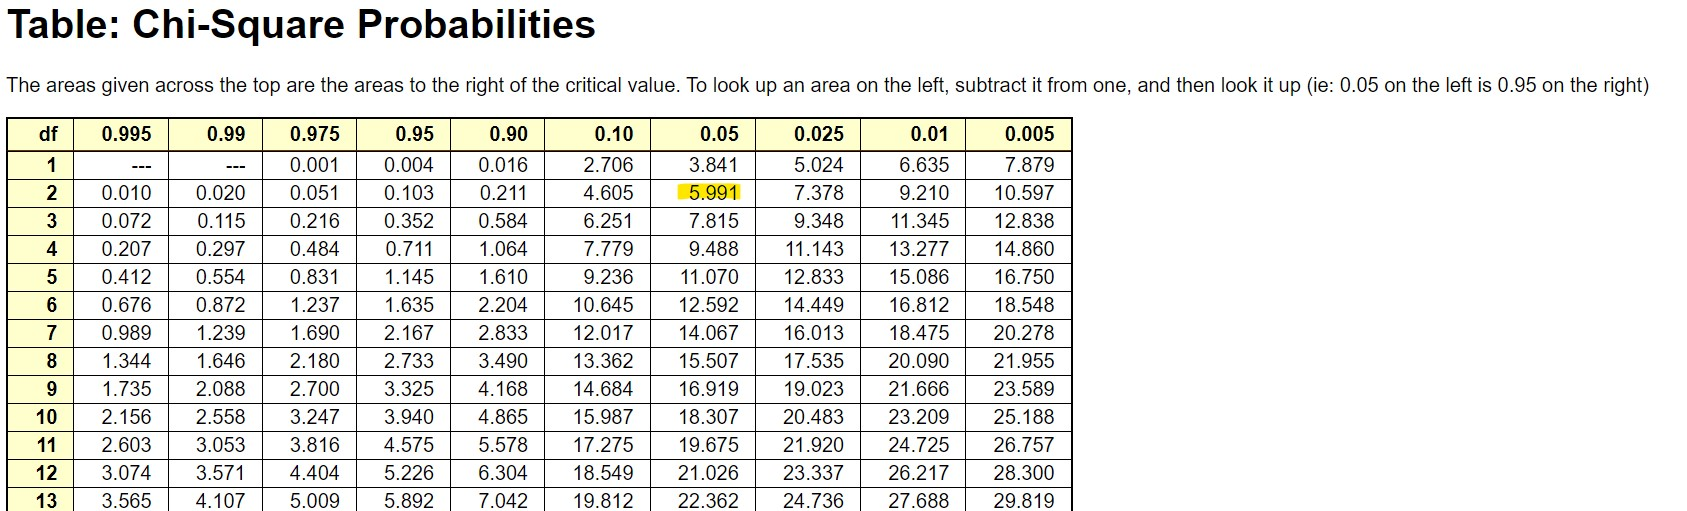

6. Compare Chi square statistic with critical value
In our case Chi Square Statistic < Chi Square Critical (5.8333 < 5.991)

Hence We Fail to Reject the Null Hypothesis

Conclusion : Outcome and Groups are Independent of each other

Question 4 : Study of the prevalence of smoking in a population of 500 individuals found that 60 individuals smoked. Use Python to calculate the 95% confidence interval for the true proportion of individuals in the population who smoke.

Asnwer :
Because sample size is large Z statistic can be used directly

In [4]:
import scipy.stats as stats
import math

# Sample size
n = 500

# Number of individuals who smoke in the sample
x = 60

# Proportion of individuals who smoke in the sample
p = x/n

# Confidence Level
confidence_level = 0.95
alpha = 1 - confidence_level

# Z-value for 95% confidence interval
z = stats.norm.ppf(1-alpha/2)

# Print critical z value 
print(f'Critical Z statistic for {confidence_level*100}% is {z:.4f}')

# Standard error of proportion
se = math.sqrt((p*(1-p))/n)

# Calculate confidence interval
lower_ci = p - z*se
upper_ci = p + z*se

print("95% confidence interval : ({:.2f}%, {:.2f}%)".format(lower_ci*100, upper_ci*100))

Critical Z statistic for 95.0% is 1.9600
95% confidence interval : (9.15%, 14.85%)


Validating above with t statistic as well

In [6]:
import scipy.stats as stats
import math

# Sample size
n = 500

# Number of individuals who smoke in the sample
x = 60

# Proportion of individuals who smoke in the sample
p = x/n

# Calculate the standard error of the sample proportion
se = math.sqrt(p * (1 - p) / n)

# Confidence level
confidence_level = 0.95
alpha = 1 -  confidence_level

# Calculate the t-value for a 95% confidence interval
t = stats.t.ppf(1-alpha/2, n - 1)

# Printing the t-statistic
print(f't statistic for {n} samples with {confidence_level*100}%  confidence is : {t:.4f}')

# Calculate the margin of error
moe = t * se

# Calculate the lower and upper bounds of the confidence interval
lower_ci = p - moe
upper_ci = p + moe

print("95% confidence interval: ({:.2f}%, {:.2f}%)".format(lower_ci*100, upper_ci*100))

t statistic for 500 samples with 95.0%  confidence is : 1.9647
95% confidence interval: (9.14%, 14.86%)


Question 5 : Calculate the 90% confidence interval for a sample of data with a mean of 75 and a standard deviation of 12 using Python. Interpret the results. 

Answer :
Sample size is not given in the question assuming the sample size to be 30

In [7]:
import scipy.stats as stats
import math

# Given data
x_bar = 75
sigma = 12
n = 30 # Assumed sample size 30

# Degrees of freedom
df = n - 1

# Confidence level 
confidence_level = 0.90
alpha = 1 -  confidence_level

# Critical value for 90% confidence interval
t_critical = stats.t.ppf(1 - alpha/2, df)
print(f't_critical for {n} samples with {confidence_level*100}% confidence is : {t_critical:.4f}')

# Calculate standard error of the mean
sem = sigma / math.sqrt(n)

# Calculate confidence interval
lower_ci = x_bar - t_critical * sem
upper_ci = x_bar + t_critical * sem

print("90% confidence interval: ({:.3f}, {:.3f})".format(lower_ci, upper_ci))

t_critical for 30 samples with 90.0% confidence is : 1.6991
90% confidence interval: (71.277, 78.723)


Interpretation : Above results mean that for sample size 30 , the estimated population mean lies between 71.277 and 78.723 with 90% confidence

Question 6 : Use Python to plot the chi-square distribution with 10 degrees of freedom. Label the axes and shade the area corresponding to a chi-square statistic of 15.

Answer :

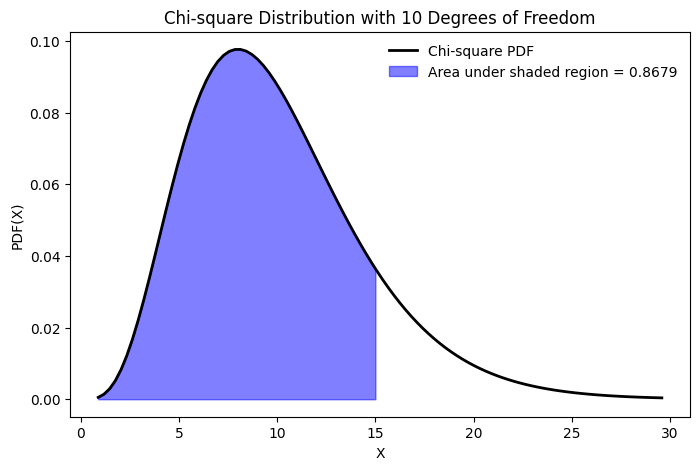

In [8]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Set degrees of freedom
df = 10

# Define range of x-values for plotting
x = np.linspace(stats.chi2.ppf(0.0001, df), stats.chi2.ppf(0.999, df), 100)

# Create plot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot chi-square distribution
ax.plot(x, stats.chi2.pdf(x, df), 'k-', lw=2, label='Chi-square PDF')

# Calculating area under curve 
area = stats.chi2.cdf(15,df)

# Shade area under the curve
x_fill = np.linspace(stats.chi2.ppf(0.0001, df), 15, 100)
ax.fill_between(x_fill, stats.chi2.pdf(x_fill, df), color='blue', alpha=0.5,label = f'Area under shaded region = {area:.4f}')

# Add legend and labels
ax.legend(loc='best', frameon=False)
ax.set_xlabel('X')
ax.set_ylabel('PDF(X)')
ax.set_title('Chi-square Distribution with 10 Degrees of Freedom')

plt.show()

Question 7 : A random sample of 1000 people was asked if they preferred Coke or Pepsi. Of the sample, 520 preferred Coke. Calculate a 99% confidence interval for the true proportion of people in the population who prefer Coke.

Answer :

In [9]:
import scipy.stats as st

n = 1000
x = 520
conf_level = 0.99
df = n - 1

# Calculate the sample proportion and standard error
p = x / n
se = ((p * (1 - p)) / n) ** 0.5

# Find the t-value
t = st.t.ppf((1 + conf_level) / 2, df)

# Print the critical value
print(f'Critical T-statistic for {conf_level*100}% confidence for {n} samples is : {t:.4f}')

# Calculate the confidence interval
lower = p - t * se
upper = p + t * se

print(f"Estimated mean population proportion with {conf_level*100}% Confidence interval: ({lower*100:.2f}%, {upper*100:.2f}%)")

Critical T-statistic for 99.0% confidence for 1000 samples is : 2.5808
Estimated mean population proportion with 99.0% Confidence interval: (47.92%, 56.08%)


Question 8 : A researcher hypothesizes that a coin is biased towards tails. They flip the coin 100 times and observe 45 tails. Conduct a chi-square goodness of fit test to determine if the observed frequencies match the expected frequencies of a fair coin. Use a significance level of 0.05

Answer :

In [10]:
import scipy.stats as stats

# Set the observed and expected frequencies
observed_frequencies = [45, 55]
expected_frequencies = [50, 50]

# Null and Alternate Hypothesis 
null_hypothesis = "The Coin is FAIR"
alternate_hypothesis = "The Coin is BIASED"

# Compute the chi-square test statistic and p-value
test_statistic, p_value = stats.chisquare(observed_frequencies, f_exp=expected_frequencies)

# Print the results
print("Chi-Square Test Statistic: {:.4f}".format(test_statistic))
print("P-value: {:.4f}".format(p_value))

# significance level
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis: {alternate_hypothesis}")
else:
    print(f"Fail to reject the null hypothesis: {null_hypothesis}")

Chi-Square Test Statistic: 1.0000
P-value: 0.3173
Fail to reject the null hypothesis: The Coin is FAIR


Question 9 : A study was conducted to determine if there is an association between smoking status (smoker or non-smoker) and lung cancer diagnosis (yes or no). The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between smoking status and lung cancer diagnosis.

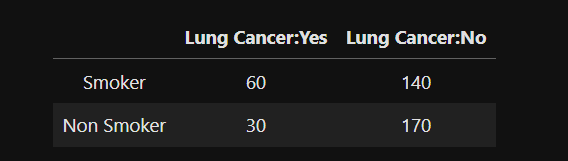

Use a significance level of 0.05.

Answer :

In [11]:
import pandas as pd
import scipy.stats as stats

# Set up the contingency table
observed_df = pd.DataFrame({'Lung Cancer:Yes':[60,30], 'Lung Cancer:No':[140,170]})
observed_df.index = ['Smoker','Non Smoker']

# Null Hypothesis and Alternate Hypothesis
null_hypothesis = "There is NO significant association between smoking status and lung cancer diagnosis."
alternate_hypothesis = "There is a SIGNIFICANT association between smoking status and lung cancer diagnosis."

# Print Observed data
print('Observed Data :')
print(observed_df)
print('\n========================================\n')

# Compute the chi-square test statistic and p-value
test_statistic, p_value, dof, expected = stats.chi2_contingency(observed_df)

# Print expected df
expected_df = pd.DataFrame(expected)
expected_df.columns = observed_df.columns
expected_df.index = observed_df.index
print('Expected Data :')
print(expected_df)

# Print the results
print("\nChi-Square Test Statistic: {:.4f}".format(test_statistic))
print("P-value: {:.4f}".format(p_value))

# Significance value
alpha = 0.05

# Compare the p-value to the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis.\nConclusion : {alternate_hypothesis}")
else:
    print(f"Fail to reject the null hypothesis.\nConculsion : {null_hypothesis}")

Observed Data :
            Lung Cancer:Yes  Lung Cancer:No
Smoker                   60             140
Non Smoker               30             170


Expected Data :
            Lung Cancer:Yes  Lung Cancer:No
Smoker                 45.0           155.0
Non Smoker             45.0           155.0

Chi-Square Test Statistic: 12.0573
P-value: 0.0005
Reject the null hypothesis.
Conclusion : There is a SIGNIFICANT association between smoking status and lung cancer diagnosis.


Question 10 : A study was conducted to determine if the proportion of people who prefer milk chocolate, dark chocolate, or white chocolate is different in the U.S. versus the U.K. A random sample of 500 people from the U.S. and a random sample of 500 people from the U.K. were surveyed. The results are shown in the contingency table below. Conduct a chi-square test for independence to determine if there is a significant association between chocolate preference and country of origin.

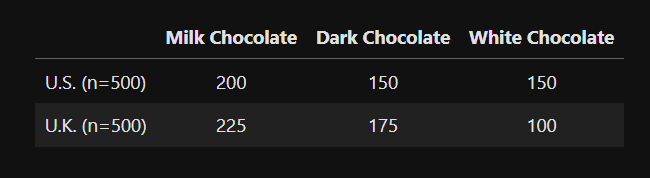

Use a significance level of 0.01.

Answer :


In [12]:
import pandas as pd
import scipy.stats as stats

# Set up the contingency table
observed_df = pd.DataFrame({'Milk Chocolate':[200,225], 'Dark Chocolate':[150,175], 'White Chocolate':[150,100]})
observed_df.index = ['U.S. (n=500)','U.K. (n=500)']
print('Observed Data :')
print(observed_df)

# Null Hypothesis and Alternate Hypothesis
null_hypothesis = "There is NO significant association between Country and Chocolate type preffered."
alternate_hypothesis = "There is a SIGNIFICANT association between Country and Chocolate type preffered."

print('\n================================================================\n')

# Compute the chi-square test statistic and p-value
test_statistic, p_value, dof, expected = stats.chi2_contingency(observed_df)

# Print expected df
expected_df = pd.DataFrame(expected)
expected_df.columns = observed_df.columns
expected_df.index = observed_df.index
print('Expected Data :')
print(expected_df)

# Print the results
print("\nChi-Square Test Statistic: {:.4f}".format(test_statistic))
print("P-value: {:.4f}".format(p_value))

# Significance value
alpha = 0.01

# Compare the p-value to the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis.\nConclusion : {alternate_hypothesis}")
else:
    print(f"Fail to reject the null hypothesis.\nConculsion : {null_hypothesis}")

Observed Data :
              Milk Chocolate  Dark Chocolate  White Chocolate
U.S. (n=500)             200             150              150
U.K. (n=500)             225             175              100


Expected Data :
              Milk Chocolate  Dark Chocolate  White Chocolate
U.S. (n=500)           212.5           162.5            125.0
U.K. (n=500)           212.5           162.5            125.0

Chi-Square Test Statistic: 13.3937
P-value: 0.0012
Reject the null hypothesis.
Conclusion : There is a SIGNIFICANT association between Country and Chocolate type preffered.


Question 11 : A random sample of 30 people was selected from a population with an unknown mean and standard deviation. The sample mean was found to be 72 and the sample standard deviation was found to be 10. Conduct a hypothesis test to determine if the population mean is significantly different from 70. Use a significance level of 0.05

Answer :

1. Using a t-test to compare the means

In [13]:
import math
from scipy.stats import t

# Sample data
sample_mean = 72
sample_std = 10
sample_size = 30

# Hypotheses
null_hypothesis = "The population mean is equal to 70."
alternative_hypothesis = "The population mean is significantly different from 70."

# Significance level
alpha = 0.05

# Degrees of freedom
df = sample_size - 1

# Calculate the t-statistic
t_stat = (sample_mean - 70) / (sample_std / math.sqrt(sample_size))

# Calculate the p-value
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

# Compare the p-value to the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis. {alternative_hypothesis} (p-value={p_value})")
else:
    print(f"Fail to reject the null hypothesis. {null_hypothesis} (p-value={p_value})")

Fail to reject the null hypothesis. The population mean is equal to 70. (p-value=0.2823362372860698)



2. Using Chi Square test to compare means

In [14]:
import numpy as np
from scipy.stats import chi2

# Sample data
sample_mean = 72
sample_std = 10
sample_size = 30

# Hypotheses
null_hypothesis = "The population mean is equal to 70."
alternative_hypothesis = "The population mean is significantly different from 70."

# Significance level
alpha = 0.05

# Degrees of freedom
df = sample_size - 1

# Expected mean
expected_mean = 70

# Calculate the chi-square statistic
chi_sq_stat = ((sample_mean - expected_mean)**2)/expected_mean
print(f'Chi Square statistic : {chi_sq_stat:.4f}')

# Calculate the p-value
p_value = 1 - chi2.cdf(chi_sq_stat, df)

# Compare the p-value to the significance level
if p_value < alpha:
    print(f"Reject the null hypothesis. {alternative_hypothesis} (p-value={p_value:.4f})")
else:
    print(f"Fail to reject the null hypothesis. {null_hypothesis} (p-value={p_value:.4f})")

Chi Square statistic : 0.0571
Fail to reject the null hypothesis. The population mean is equal to 70. (p-value=1.0000)
